In [1]:
import numpy as np
from scipy.stats.mstats import gmean 
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import pandas as pd


np.set_printoptions(suppress=True)

In [2]:
cm_p1 = np.array([[.351, .1474, .1282, .164, .1016, .1178],
                [0.1111, 0.5463, 0.0903, 0.1065, 0.0556, 0.0903],
                [0.1179, 0.1202, 0.3688, 0.1572, 0.1341, 0.1017],
                [0.1561, 0.1341, 0.1514, 0.3792, 0.1075, 0.0717],
                [0.1134, 0.9938, 0.1505, 0.1389, 0.2546, 0.2488],
                [0.1019, 0.1065, 0.1262, 0.0544, 0.1817, 0.4294]])

cm_p2 = np.array([[.2436, .1351, .1305, .1617, .149, .1801],
                [0.0683,0.6516,0.066,0.0856,0.0475,0.081],
                [0.1308,0.1134,0.2882,0.191,0.1331,0.1435],
                [0.1169,0.1447,0.1609,0.3843,0.088,0.1053],
                [0.1713,0.0984,0.1701,0.1528,0.2118,0.1956],
                [0.1528,0.0961,0.1181,0.1227,0.1759,0.3345]])

cm_p3 = np.array([[.3156, .1272, .1353, .148, .1422, .1388],
                  [.103, .5683, .0556, .14, .081, .0521],
                  [.1354, .0799, .331, .1782, .1389, .1366],
                  [.1181, .1701, .1701, .353, .0972, .0914],
                  [.1447, .103, .1424, .1377, .2362, .2361],
                  [.1296, 0.0962, 0.1458, 0.0972, 0.1863, 0.3449]])

cm_p4 = np.array([[.3249, .1376, .1283, .1873, .1249, .0971],
                 [.1064, .6821, .0636, .0636, .0347, .0497], 
                 [.1053, .0856, .3981, .125, .1528, .1331],
                 [.169, .1377, .1366, .3252, .14, .0914],
                 [.1134, .0498, .14, .1296, .3819, .1852],
                 [.1586, .0729, .1956, .0903, .228, .2546]])

cm_p5 = np.array([[.3229, .0845, 0.1377, .1725, .1319, .1505],
                 [.0602, .6481, .0394, .1238, .0648, .0637],
                 [.1678, .0856, .2975, .1678, .1389, .1424],
                 [.1283, .1329, .1341, .4462, .0821, .0763],
                 [.1377, .1065, .1562, .1065, .2697, .2234],
                 [.1701, .1065, .1412, .1053, .1817, .2952]])

In [3]:
cm_all = (cm_p1 + cm_p2 + cm_p3  + cm_p4 + cm_p5)/6
print(cm_all)

[[0.25966667 0.1053     0.11       0.13891667 0.10826667 0.11405   ]
 [0.07483333 0.51606667 0.05248333 0.08658333 0.04726667 0.05613333]
 [0.10953333 0.08078333 0.2806     0.13653333 0.1163     0.10955   ]
 [0.11473333 0.11991667 0.12551667 0.31465    0.0858     0.07268333]
 [0.11341667 0.22525    0.12653333 0.11091667 0.2257     0.18151667]
 [0.11883333 0.0797     0.12115    0.07831667 0.15893333 0.27643333]]


In [22]:
def RSA_function(CM):
    
    dim = CM.shape[0]
    
    #normalize
    for i in range(CM.shape[0]):
        CM[i,:] = CM[i,:]/CM[i,i]
        
    # mean similarity measure: geometric mean of normalized CM and CM.T 
    S = np.sqrt(np.dot(CM,CM.T))
    S_ = 1 - S
    
    # lower triangular and set diagonal to zeros
    D = S_ - np.triu(S_)
    
    return D, S_

In [23]:
D, S_ = RSA_function(cm_all.copy())

for i in range(S_.shape[0]):
    S_[i,i] = 0 
    
print(D)
print('\n')
print(S_)

[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.12288676  0.          0.          0.          0.          0.        ]
 [-0.23907911  0.22008938  0.          0.          0.          0.        ]
 [-0.19929346  0.16787531 -0.15790615  0.          0.          0.        ]
 [-0.47573791 -0.17873146 -0.4183367  -0.31799837  0.          0.        ]
 [-0.25018273  0.22270656 -0.20649628 -0.05477182 -0.50594525  0.        ]]


[[ 0.          0.12288676 -0.23907911 -0.19929346 -0.47573791 -0.25018273]
 [ 0.12288676  0.          0.22008938  0.16787531 -0.17873146  0.22270656]
 [-0.23907911  0.22008938  0.         -0.15790615 -0.4183367  -0.20649628]
 [-0.19929346  0.16787531 -0.15790615  0.         -0.31799837 -0.05477182]
 [-0.47573791 -0.17873146 -0.4183367  -0.31799837  0.         -0.50594525]
 [-0.25018273  0.22270656 -0.20649628 -0.05477182 -0.50594525  0.        ]]


https://github.com/stober/mds/blob/master/src/mds.py?fbclid=IwAR36FTBwo1jMxDa324pIzDKrHoarvQ7hvWMsSl0_u2JoGCNUAoGBdlolRXA

In [24]:
from __future__ import division
 
import numpy as np
 
def cmdscale(D):
    """                                                                                       
    Classical multidimensional scaling (MDS)                                                  
                                                                                               
    Parameters                                                                                
    ----------                                                                                
    D : (n, n) array                                                                          
        Symmetric distance matrix.                                                            
                                                                                               
    Returns                                                                                   
    -------                                                                                   
    Y : (n, p) array                                                                          
        Configuration matrix. Each column represents a dimension. Only the                    
        p dimensions corresponding to positive eigenvalues of B are returned.                 
        Note that each dimension is only determined up to an overall sign,                    
        corresponding to a reflection.                                                        
                                                                                               
    e : (n,) array                                                                            
        Eigenvalues of B.                                                                     
                                                                                               
    """
    # Number of points                                                                        
    n = len(D)
 
    # Centering matrix                                                                        
    H = np.eye(n) - np.ones((n, n))/n
 
    # YY^T                                                                                    
    B = -H.dot(D**2).dot(H)/2
 
    # Diagonalize                                                                             
    evals, evecs = np.linalg.eigh(B)
 
    # Sort by eigenvalue in descending order                                                  
    idx   = np.argsort(evals)[::-1]
    evals = evals[idx]
    evecs = evecs[:,idx]
 
    # Compute the coordinates using positive-eigenvalued components only                      
    w, = np.where(evals > 0)
    L  = np.diag(np.sqrt(evals[w]))
    V  = evecs[:,w]
    Y  = V.dot(L)
 
    return Y, evals

In [25]:
mds_mat, eigvals = cmdscale(S_)
print("mds matrix")
print(mds_mat)
print('\n')
print("eigenvalues")
print(eigvals)
print('\n')
print('2 principal components of mds matrix')
print(mds_mat[:,:2])

mds matrix
[[-0.11909456 -0.15385522 -0.00518703  0.01074353 -0.        ]
 [ 0.0742976  -0.06634121  0.02098393 -0.01937525 -0.        ]
 [-0.08043321  0.05806103 -0.12621166 -0.00429821 -0.        ]
 [-0.02530213  0.06578665  0.03659561  0.02599156 -0.        ]
 [ 0.32419737  0.01942838  0.00284686  0.00153176 -0.        ]
 [-0.17366508  0.07692037  0.07097229 -0.01459338 -0.        ]]


eigenvalues
[ 0.16207684  0.04206576  0.02278102  0.00140017  0.         -0.03469969]


2 principal components of mds matrix
[[-0.11909456 -0.15385522]
 [ 0.0742976  -0.06634121]
 [-0.08043321  0.05806103]
 [-0.02530213  0.06578665]
 [ 0.32419737  0.01942838]
 [-0.17366508  0.07692037]]


In [26]:
# verify orthogonality
if False:
    for i in range(4):
        for j in range(4):
            if j!=i:
                print(np.dot(mds_mat[:,i], mds_mat[:,j]))

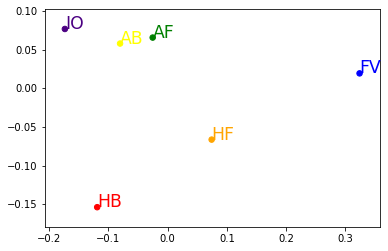

In [27]:
names = ["HB", "HF", "AB", "AF", "FV", "IO"]
cmap = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo']

mds_mat_2comp = mds_mat[:,0:2]
plt.scatter(mds_mat_2comp[:,0],mds_mat_2comp[:,1], s=30, c=cmap)
for i in np.arange(0,6):
        plt.annotate(names[i], mds_mat_2comp[i], color=cmap[i], size = 'xx-large')
plt.show()

## CLUSTERING

https://en.wikipedia.org/wiki/UPGMA#:~:text=UPGMA%20(unweighted%20pair%20group%20method,weighted%20variant%2C%20the%20WPGMA%20method.

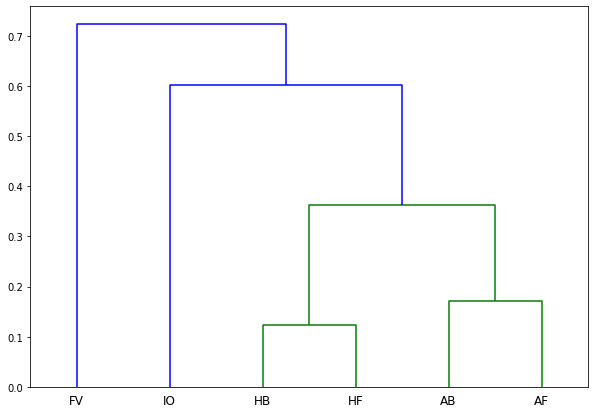

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

data = D.copy()

linked = linkage(data, 'average')

labelList = ["HB", "HF", "AB", "AF", "FV", "IO"]

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

# TEMPORAL

Adding Window i of Particiapant 1,2,3,4,9 together

for example -> window1 of p1 + window1 of p2 +... +window1 of p9

then extract final cm's for each window

In [38]:
cm_w1 = np.array([[.16 + .14+ .16, .13 + .17+ .14, .19 + .14+ .22, .15+ .16 + 0.16+ .12, .17 + .12, .17 + .18+ .17],
                [.20 + .15+ .16, .16 + .17+ .16, .18 + .14+ .17, .14 + .18+ .15, .15 + .14+ .13,   .19+ .15+ .2],
                [.16 + .17+ .189, .14 + .18+ .16, .19 + 0.02+ .17, .16 + .16+ .15, .17 + .17+ .13,   .16 + .16+ .2],
                [.15 + .17+ .17, .17 + .18+ .16, .15 +0.2+ .2 , .15 + .16+ .17, .16 + .17+ .14,  .16 + .19+ .145],
                [.15 + .14+ .16, .17 + .17+ .18, .20 + .14+ .19, .10 + .17+ .16, .18 + .15+ .1 ,   .16 + 0.2+ .17],
                [.17 + .15+ .16, .16 + 18+ .16, .19 + .14+ .20, .13 + .17+ .15, .16 + .16+ .1,  .17 + .17+ .19]])

cm_w2 = np.array([[.14 + .18+ .21, .19 + .18+ .19, .17 + .17+ .14, .14 + .14+ .15 , .17 + .139+ .13, .17 + .16+ .13],
                [ .7 + .14+ .16,  .19 + .25+ .29,  .17 + .17+ .13, .15 + .14+ .14, .16 + .14+ .11, .13 + .14+ .13],
                [.15 + .18+ .17, .15 + .18+ .21, .21 + .18+ .14, .09 + .13+ .14, .19 + .16+ .11,   .15 + .14+ .13],
                [.09 + .16+ .17, .22 + .2+ .21, .18 + .16 + .14, .15 + .14+ .14, .15 + .18+ .15,  .16 + .14+ .16],
                [.12 + .14+ .19, .17 + .2+ .2, .16 + .16+ .16, .15 + .13+ .12 , .18 + .17+ .14 ,   .19 + .17+ .16],
                [.14 + .17+ .19, .15  + .17+ .19, .16  + .16+ .15, .13  + .13+ .13, .21  + .15+ .15,  .18 + .19+ .15]])

cm_w3 = np.array([[.22  + .25+ .21, .18  + .15+ .18, .13 + .15+ .1, .14 + .2+ .15, .16 + .12+ .15, .15 + .18+ .13],
                [.09 + .13+ .09, .52 + .45+ .54, .09 + .09+ .09, .12 + .12+ .1, .08 + .07+ .06,   .08 + .12+ .1],
                [.11 + .13+ .09, .10 + .15+ .13, .31 + .33+ .31, .15 + .14+ .16, .15 + .13+ .11,   .14 + .10+ .17],
                [.15 + .13+ .14, .20 + .2+ .16, .19 + .2 + .14, .19 + .21+ .28, .12 + .13+ .14,  .12 + .11+ .11],
                [.16 + .13+ .16, .12 + .13+ .1, .19 + .2+ .2, .16 + .13+ .18, .17 + .17+ .17,   .17 + .21+ .17],
                [.17 + .169+ .14, .15 + .17+ .15, .17 + .14+ .19, .11 + .10+ .11, .16 + .15+ .13,  .21 + .24+ .25]])

cm_w4 = np.array([[.2  + .31+ .33, .13 + .13+ .16, .15 + .1+ .13, .18 + .18+ .15, .12 + .13+ .13, .19 + .12+ .08],
                [.07  + .1+ .09, .54 + .57+ .62, .07 + .05+ .06, .14 + .08+ .08, .08 + .07+ .04,   .07 + .09+ .07],
                [.12 + .14+ .1, .10+ .11+ .13, .31+ .32+ .32, .17+ .17+ .15, .12+ .12+ .12,   .14+ .11+ .15],
                [.12+ .13+ .18, .17+ .13+ .13, .18+ .16+ .12 , .29+ .36+ .3, .12+ .11+ .13,  .09+ .09+ .1],
                [.13+ .12+ .14, .13+ .11+ .08, .15+ .16+ .14, .114+ .14+ .14, .22+ .19+ .28,  .20+ .25+ .19],
                [.14+ .14+ .13, .12+ .13+ .1, .16+ .11+ .19, .08+ .07+ .08, .18+ .19+ .2,  .29+ .33+ .27]])  

cm_w5 = np.array([[.22 + .31+ .33, .18+ .13+ .13, .15+ .11+ .12, .16+ .16+ .16, .11+ .139+ .12, .16+ .13+ .11],
                [.11+ .1+ .09, .46+ .48+ .60, .07+ .13+ .08, .14+ .08+ .08, .09+ .07+ .04,   .10+ .11+ .07],
                [.11+ .13+ .1, .10+ .15+ .13, .31+ .3+ .32, .18+ .17+ .15, .13+ .1+ .12,   .15+ .12+ .14],
                [.14+ .16+ .14, .18+ .09+ .1, .16+ .15+ .14 , .29+ .4+ .13, .13+ .1+ .28,  .08+ .07+ .2],
                [.13+ .15+ .13, .14+ .11+ .1, .17+ .12+ .14, .14+ .16+ .13, .20+ .21+ .28,   .20+ .22+ .2],
                [.14+ .12+ .12, .14+ .11+ .09, .18+ .1+ .17, .09+ .09+ .08, .15+ .14+ .2,  .27+ .41+ .3]])


cm_w6 = np.array([[.23+ .34+ .27, .21+ .14+ .14, .17+ .13+ .14, .13+ .16+ .18, .1+ .09+ .13,   .14+ .11+ .13],
                [.14+ .14+ .1, .47+ .35+ .52, .06+ .12+ .12, .15+ .11+ .09, .08+ .1+ .06,    .08+ .15+ .09],
                [.13+ .129+ .1, .09+ .13+ .14, .32+ .31+ .41, .17+ .17+ .129, .12+ .12+ .1,    .15+ .12+ .09],
                [.12+ .17+ .18, .2+ .13+ .1, .17+ .14+ .13 , .29+ .35+ .32, .08+ .1+ .149,     .1+ .07+ .08],
                [.1377+ .12+ .13, .14+ .1377+ .1, .18+ .14+ .13, .13+ .16+ .14, .17+ .19+ .31,  .22+ .23+ .16],
                [.17+ .12+ .14, .16+ .11+ .14, .19+ .14+ .17, .13+ .06+ .11, .16+ .12+ .2,   .17+ .4155+ .21]])

cm_w7 = np.array([[.26+ .28+ .19, .17+ .14+ .18, .13+ .15+ .19, .16+ .18+ .16, .11+ .08+ .13,   .14+ .14+ .13],
                [.12+ .14+ .1, .38+ .28+ .47, .08+ .15+ .11, .16+ .15+ .12, .12+ .11+ .07,     .11+ .15+ .09],
                [.17+ .11+ .13, .13+ .12+ .11, .22+ .3+ .36, .15+ .16+ .12, .12+ .09+ .13,     .17+ .08+ .12],
                [.15+ .2+ .14, .19+ .13+ .17, .16+ .15+ .12 , .23+ .31+ .31, .11+ .09+ .14,    .13+ .08+ .1],
                [.13+ .12+ .1, .14+ .14+ .11, .15+ .15+ .14, .13+ .15+ .11, .18+ .17+ .33,     .24+ .23+ .17],
                [.11+ .12+ .12, .14+ .10+ .14, .15+ .13+ .19, .1+ .09+ .11, .17+ .14+ .21,      .3+ .4+ .21]])

cm_w8 = np.array([[.19+ .26+ .25, .20+ .15+ .21, .12+ .15+ .13, .16+ .15+ .15, .17+ .1+ .12, .13+ .16+ .11],
                [.15+ .17+ .15, .36+ .29+ .5, .09+ .12+ .06, .14+ .13+ .12, .13+ .11+ .06,   .11+ .15+ .08],
                [.15+ .14+ .1, .19+ .15+ .11, .16+ .23+ .34, .15+ .15+ .14, .17+ .15+ .16,   .15+ .15+ .128],
                [.15+ .17+ .15, .2+ .18+ .2, .15+ .16+ .19 , .2+ .2+ .184, .12+ .1+ .129,  .14+ .16+ .13],
                [.15+ .11+ .129, .18+ .15+ .11, .15+ .16+ .19, .12+ .13+ .128, .2+ .21+ .24,   .16+ .21+ .19],
                [.12+ .14+ .15, .17+ .13+ .13, .14+ .11+ .19, .16+ .11+ .12, .18+ .15+ .24,  .2+ .33+ .19]])

cm_w9 = np.array([[.14+ .21+ .27, .24+ .2+ .21, .1+ .11+ .14, .16+ .18+ .11, .17+ .13+ .12, .15+ .16+ .12],
                [.13+ .15+ .15, .39+ .37+ .55, .07+ .1+ .05, .13+ .14+ .08, .1+ .09+ .06,   .15+ .12+ .09],
                [.13+ .14+ .129, .17+ .18+ .11, .13+ .16+ .33, .17+ .16+ .14, .16+ .14+ .17,   .20+ .19+ .1],
                [.14+ .16+ .13, .21+ .16+ .1, .13+ .13+ .2 , .19+ .25+ .13, .12+ .12+ .28,  .19+ .15+ .13],
                [.15+ .12+ .13, .20+ .14+ .1, .10+ .15+ .2, .13+ .14+ .13, .22+ .2+ .28,   .17+ .23+ .13],
                [.12+ .11+ .17, .17+ .13+ .16, .13+ .12+ .18, .12+ .11+ .11, .15+ .14+ .189,  .28+ .35+ .17]])

keep_cm=[cm_w1/3,cm_w2/3,cm_w3/3,cm_w4/3,cm_w5/3,cm_w6/3,cm_w7/3,cm_w8/3,cm_w9/3]



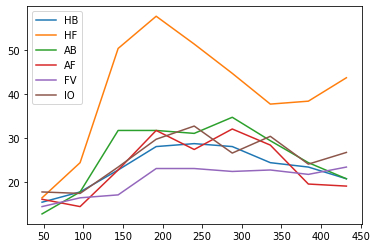

In [39]:
diag = []

for i in range(0,6):
    diag_cm = [ (keep_cm[j][i][i]*100) for j in range(len(keep_cm)) ]
    diag.append(diag_cm)

legends = ["HB", "HF", "AB", "AF", "FV", "IO"]

x = np.arange(48, 433,48)
        
for i in range(0,6):
    plt.plot(x, diag[i])

plt.legend(legends, loc='upper left')

plt.show()

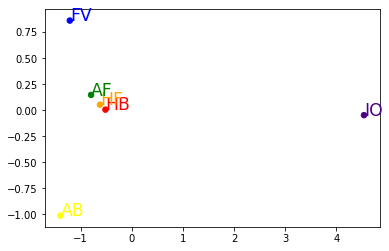

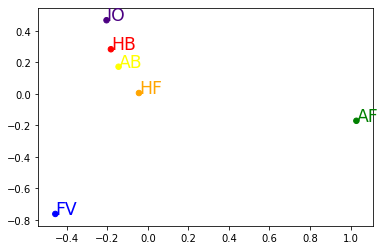

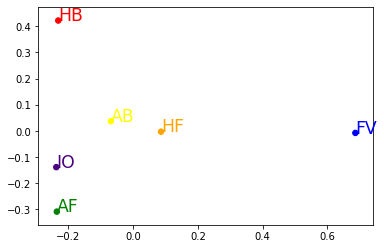

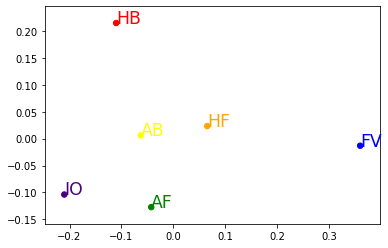

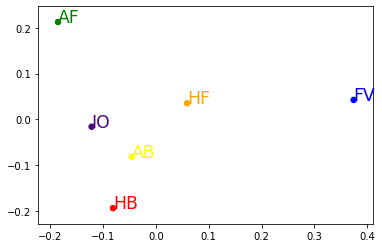

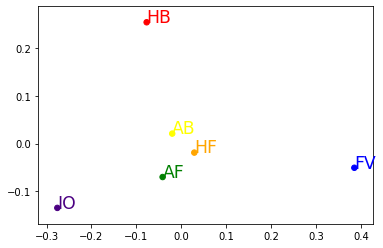

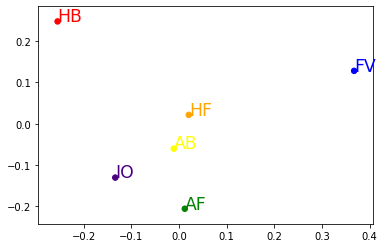

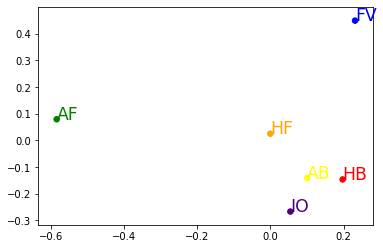

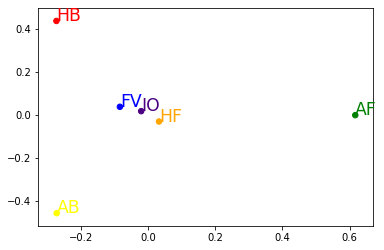

In [40]:
for temp in keep_cm:
    D, S_ = RSA_function(temp.copy())

    for i in range(S_.shape[0]):
        S_[i,i] = 0 
    mds_mat, eigvals = cmdscale(S_)
    names = ["HB", "HF", "AB", "AF", "FV", "IO"]
    cmap = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo']

    mds_mat_2comp = mds_mat[:,0:2]
    plt.scatter(mds_mat_2comp[:,0],mds_mat_2comp[:,1], s=30, c=cmap)
    for i in np.arange(0,6):
        plt.annotate(names[i], mds_mat_2comp[i], color=cmap[i], size = 'xx-large')
    plt.show()
    

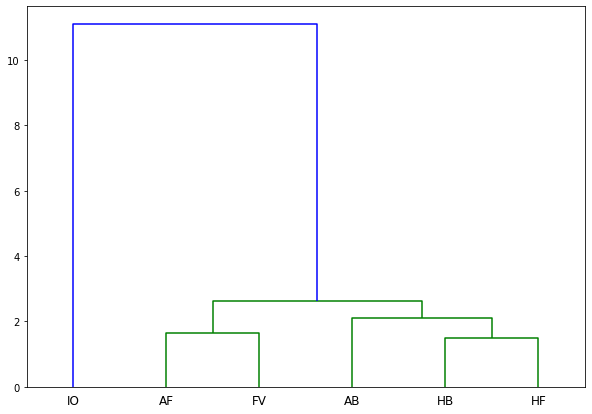

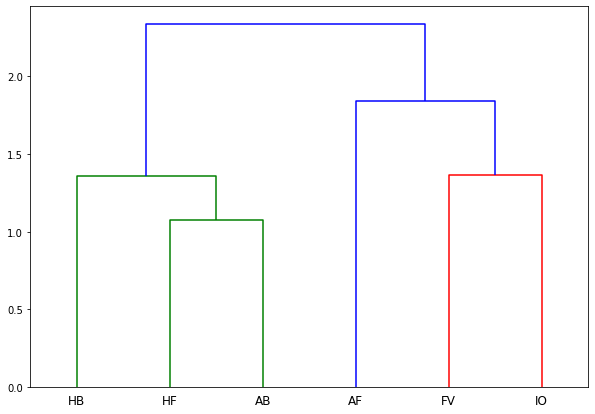

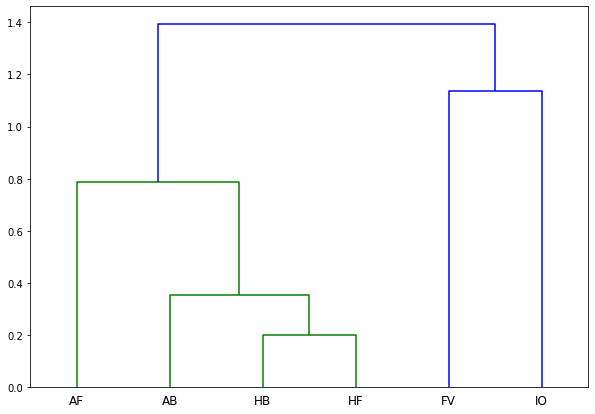

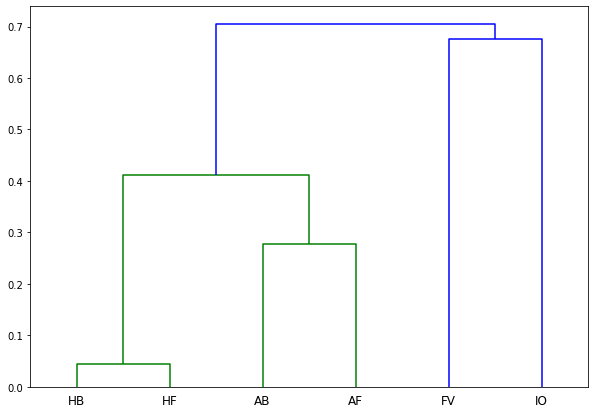

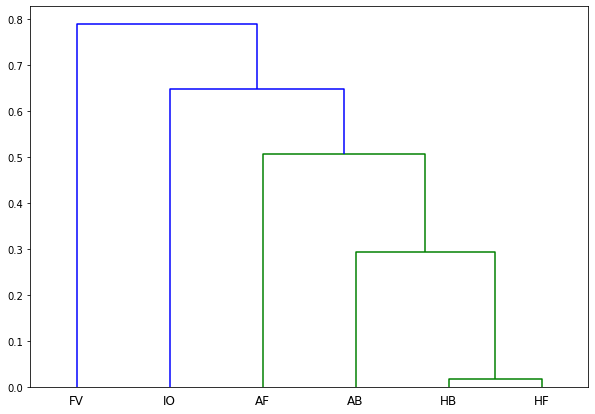

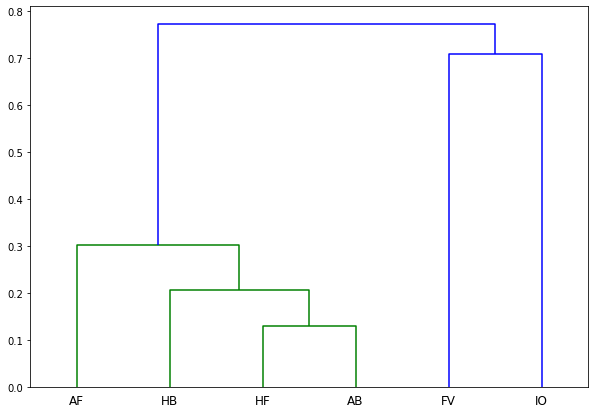

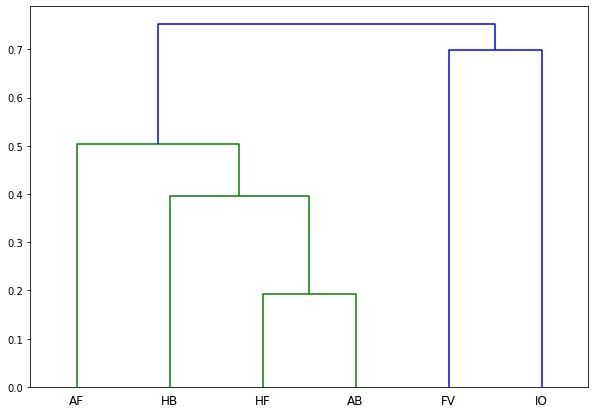

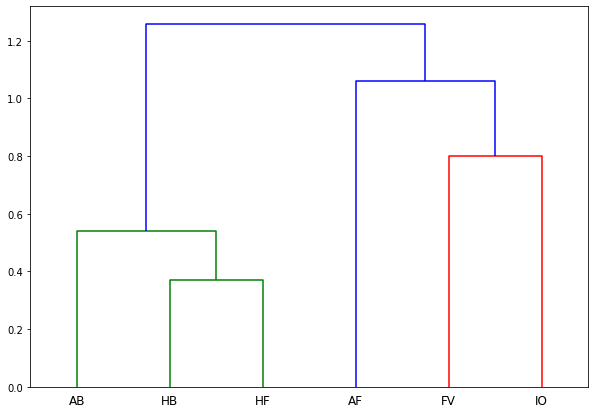

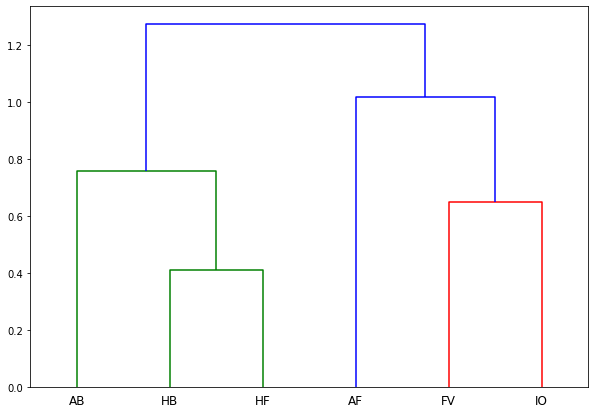

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
for temp in keep_cm:
    D, S_ = RSA_function(temp.copy())

    data = D.copy()

    linked = linkage(data, 'average')

    labelList = ["HB", "HF", "AB", "AF", "FV", "IO"]

    plt.figure(figsize=(10, 7))
    dendrogram(linked,
                orientation='top',
                labels=labelList,
                distance_sort='descending',
                show_leaf_counts=True)
    plt.show()